In [205]:
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from keras.models import Sequential
from keras import metrics
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [206]:
df = pd.read_csv("dengue_features_train.csv", index_col=[0, 1, 2])
    
# add labels to dataframe
labels = pd.read_csv("dengue_labels_train.csv", index_col=[0, 1, 2])
df = df.join(labels)

# separate san juan and iquitos
sj = df.loc['sj']
iq = df.loc['iq']


df = pd.read_csv("dengue_features_train.csv")
    
# add labels to dataframe
labels = pd.read_csv("dengue_labels_train.csv")

df["total_cases"] = labels.total_cases



In [207]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [208]:
df["reanalysis_air_temp_k"]

0       297.572857
1       298.211429
2       298.781429
3       298.987143
4       299.518571
5       299.630000
6       299.207143
7       299.591429
8       299.578571
9       300.154286
10      299.512857
11      299.667143
12      299.558571
13      299.862857
14      300.391429
15      299.958571
16      300.332857
17      300.118571
18      300.530000
19      300.674286
20      299.857143
21      300.427143
22      300.775714
23      299.857143
24      299.195714
25      298.902857
26      299.727143
27      299.972857
28      300.350000
29      299.511429
           ...    
1426    298.762857
1427    299.198571
1428    298.347143
1429    297.181429
1430           NaN
1431    299.264286
1432    298.297143
1433    298.925714
1434    298.291429
1435    298.754286
1436    298.251429
1437    299.648571
1438    298.917143
1439    298.337143
1440    298.837143
1441    299.191429
1442    299.004286
1443    299.002857
1444    299.115714
1445    298.305714
1446    298.438571
1447    299.

In [209]:
#There are null values in the dataset
df.describe

<bound method NDFrame.describe of      city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
6      sj  1990          24      1990-06-11  0.112900  0.092800  0.205071   
7      sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
8      sj  1990          26      1990-06-25  0.102450  0.146175  0.125571   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
10     sj  1990          28      1990-07-09  0.192875  0.082350  0.191943   
11     sj  1990          29      1990-07-1

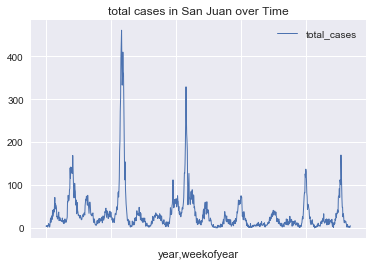

In [210]:
#check if total_cases got a correlation to time -> there is none
(sj
 .total_cases
 .plot
 .line(lw = 1),)
plt.title("total cases in San Juan over Time")    
plt.legend()
plt.show()

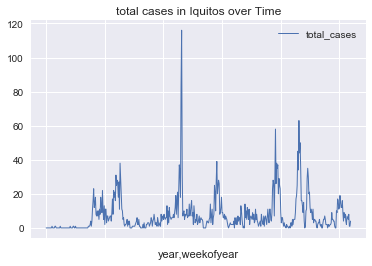

In [211]:
#check if total_cases got a correlation to time -> there is none

(iq
 .total_cases
 .plot
 .line(lw = 1),
     )
plt.legend()
plt.title("total cases in Iquitos over Time")
plt.show()

In [212]:
sj_corr = sj.corr()

# plot the heatmap
#sns.heatmap(corr, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)



cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

sj_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation of Features in San Juan")\
    .set_precision(2)\
    .set_table_styles(magnify())
    



,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
ndvi_ne,1,0.67,0.23,0.18,-0.049,-0.073,-0.071,-0.04,-0.045,-0.096,0.0044,0.039,-0.049,-0.035,-0.0092,0.064,0.14,0.092,0.019,-0.086,0.038
ndvi_nw,0.67,1,0.2,0.21,-0.032,-0.077,-0.076,-0.026,-0.046,-0.075,0.0094,0.077,-0.032,-0.021,-0.051,0.087,0.18,0.14,0.016,-0.076,0.075
ndvi_se,0.23,0.2,1,0.82,-0.12,-0.015,-0.012,-0.063,-0.0074,-0.046,-0.13,-0.11,-0.12,-0.058,0.029,-0.057,0.018,-0.064,-0.069,-0.14,0.0011
ndvi_sw,0.18,0.21,0.82,1,-0.12,-0.043,-0.036,-0.088,-0.015,-0.072,-0.13,-0.12,-0.12,-0.081,0.052,-0.041,0.07,-0.018,-0.074,-0.18,-0.00033
precipitation_amt_mm,-0.049,-0.032,-0.12,-0.12,1,0.23,0.22,0.4,0.26,0.25,0.51,0.5,1,0.41,-0.094,0.2,-0.16,0.19,0.22,0.57,0.06
reanalysis_air_temp_k,-0.073,-0.077,-0.015,-0.043,0.23,1,1,0.9,0.94,0.94,0.08,0.3,0.23,0.9,0.18,0.88,0.039,0.7,0.83,0.11,0.18
reanalysis_avg_temp_k,-0.071,-0.076,-0.012,-0.036,0.22,1,1,0.9,0.94,0.94,0.062,0.29,0.22,0.9,0.2,0.88,0.054,0.7,0.83,0.098,0.18
reanalysis_dew_point_temp_k,-0.04,-0.026,-0.063,-0.088,0.4,0.9,0.9,1,0.85,0.9,0.33,0.68,0.4,1,-0.036,0.87,-0.057,0.69,0.85,0.29,0.2
reanalysis_max_air_temp_k,-0.045,-0.046,-0.0074,-0.015,0.26,0.94,0.94,0.85,1,0.83,0.091,0.29,0.26,0.85,0.35,0.85,0.11,0.76,0.77,0.1,0.19
reanalysis_min_air_temp_k,-0.096,-0.075,-0.046,-0.072,0.25,0.94,0.94,0.9,0.83,1,0.13,0.39,0.25,0.9,-0.053,0.84,-0.024,0.63,0.83,0.15,0.19


In [213]:
iq_corr = iq.corr()

# plot the heatmap
#sns.heatmap(corr, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)



cmap = sns.diverging_palette(5, 250, as_cmap=True)


iq_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation of Features in Iquitos")\
    .set_precision(2)\
    .set_table_styles(magnify())
    

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
ndvi_ne,1,0.76,0.77,0.84,-0.012,0.15,0.17,-0.032,0.21,-0.00049,-0.084,-0.13,-0.012,-0.031,0.16,0.11,0.15,0.14,-0.016,0.0087,0.02
ndvi_nw,0.76,1,0.64,0.76,-0.06,0.15,0.17,-0.035,0.2,0.0054,-0.077,-0.13,-0.06,-0.031,0.16,0.12,0.2,0.16,-0.098,-0.013,-0.0096
ndvi_se,0.77,0.64,1,0.71,-0.044,0.2,0.21,-0.064,0.26,-0.023,-0.12,-0.19,-0.044,-0.062,0.22,0.11,0.19,0.17,-0.062,0.012,-0.041
ndvi_sw,0.84,0.76,0.71,1,-0.02,0.16,0.18,-0.031,0.23,0.0032,-0.064,-0.14,-0.02,-0.027,0.17,0.11,0.18,0.18,-0.063,-0.0054,0.033
precipitation_amt_mm,-0.012,-0.06,-0.044,-0.02,1,-0.049,-0.054,0.47,-0.23,0.32,0.34,0.43,1,0.47,-0.38,0.11,-0.18,-0.012,0.31,0.38,0.09
reanalysis_air_temp_k,0.15,0.15,0.2,0.16,-0.049,1,0.97,0.15,0.75,0.41,-0.085,-0.55,-0.049,0.18,0.55,0.6,0.51,0.64,0.24,-0.13,0.097
reanalysis_avg_temp_k,0.17,0.17,0.21,0.18,-0.054,0.97,1,0.14,0.78,0.4,-0.11,-0.54,-0.054,0.17,0.6,0.57,0.51,0.62,0.21,-0.13,0.08
reanalysis_dew_point_temp_k,-0.032,-0.035,-0.064,-0.031,0.47,0.15,0.14,1,-0.25,0.75,0.57,0.74,0.47,1,-0.61,0.33,-0.26,0.08,0.62,0.18,0.23
reanalysis_max_air_temp_k,0.21,0.2,0.26,0.23,-0.23,0.75,0.78,-0.25,1,-0.046,-0.26,-0.73,-0.23,-0.24,0.8,0.37,0.59,0.59,-0.091,-0.2,-0.056
reanalysis_min_air_temp_k,-0.00049,0.0054,-0.023,0.0032,0.32,0.41,0.4,0.75,-0.046,1,0.4,0.36,0.32,0.76,-0.4,0.41,-0.066,0.2,0.59,0.098,0.21


In [214]:
#reanalysis_avg_temp_k and reanalysis_air_temp_k are correlating
#reanalysis_sat_precip_amt_mm and precipitation_amt_mm are correlating
#reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k are correlating
#one features from each pair can be dropped


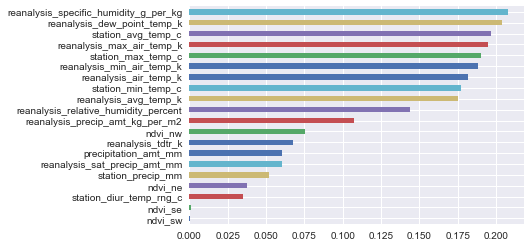

In [215]:
sns.set(font_scale = 1)
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

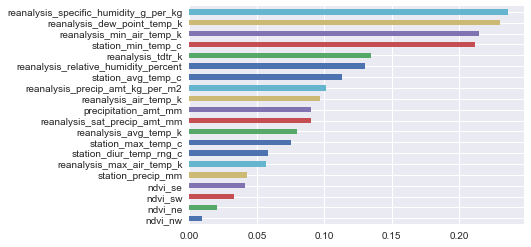

In [216]:
sns.set(font_scale = 1)
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())

In [217]:
#ndvi_sw and ndvi_se are not relevant in each city so both can be dropped


In [218]:
#after understanding the dataset now move on to the data mining

def get_data(data_path, labels_path):
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
   
    df = df.drop(columns=['week_start_date'])
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
        
    return df

def prepare_data(data_path, labels_path):
    # load data and set index to city, year, weekofyear
    df = get_data(data_path, labels_path)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']

    return sj, iq

def preprocess_and_prepare_data(data_path, labels_path):
    #get df
    df = get_data(data_path, labels_path)
    #drop all features wich are correlating with another
    df = df.drop(columns=['reanalysis_avg_temp_k'])
    df = df.drop(columns=['reanalysis_sat_precip_amt_mm'])
    df = df.drop(columns=['reanalysis_specific_humidity_g_per_kg'])
    
    #change the unit of all temperatures to Celcius
    
    df['reanalysis_min_air_temp_c'] = df['reanalysis_min_air_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_min_air_temp_k'])
    
    df['reanalysis_max_air_temp_c'] = df['reanalysis_max_air_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_max_air_temp_k'])
    
    df['reanalysis_dew_point_temp_c'] = df['reanalysis_dew_point_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_dew_point_temp_k'])
    
    df['reanalysis_air_temp_c'] = df['reanalysis_air_temp_k'] - 273.15
    df = df.drop(columns=['reanalysis_air_temp_k'])

    #normalize data
    df_norm = (df - df.mean()) / (df.max() - df.min())

    
    sj = df.loc['sj']
    iq = df.loc['iq']


    return sj, iq

In [219]:
sj_train, iq_train = preprocess_and_prepare_data('dengue_features_train.csv',
                                    labels_path="dengue_labels_train.csv")
    

X = sj_train.drop(columns=["total_cases"])
y = sj_train["total_cases"]
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X, y, random_state = 5)

In [220]:
#export to util packege TODO
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

#Regressionen
hyper = frange(0.1, 3.0, 0.1)
#Ridge Regression
best_hyper_ridge = 0
best_score_ridge = 0

#train model
for i in hyper:
    ridge = Ridge(alpha=i, solver="cholesky", random_state=1)
    ridge.fit(X_train_iq, y_train_iq)
    temp = ridge.score(X_test_iq, y_test_iq)
    if temp > best_score_ridge:
        best_hyper_ridge = i
        best_score_ridge = temp

ridge = Ridge(alpha=best_hyper_ridge, solver="cholesky", random_state=1)
ridge.fit(X_train_iq, y_train_iq)
    
print("Training set score: {:.2f}".format(ridge.score(X_train_iq, y_train_iq)))
print("Test set score: {:.2f}".format(ridge.score(X_test_iq, y_test_iq)))

#Lasso Regression

best_hyper_lasso = 0
best_score_lasso = 0

#train model
for i in hyper:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_iq, y_train_iq)
    temp = lasso.score(X_test_iq, y_test_iq)
    if temp > best_score_lasso:
        best_hyper_lasso = i
        best_score_lasso = temp

lasso = Lasso(alpha=best_hyper_lasso)
lasso.fit(X_train_iq, y_train_iq)

print("Training set score: {:.2f}".format(lasso.score(X_train_iq, y_train_iq)))
print("Test set score: {:.2f}".format(lasso.score(X_test_iq, y_test_iq)))

Training set score: 0.14
Test set score: 0.11
Training set score: 0.14
Test set score: 0.11


33 0.6037694683105634


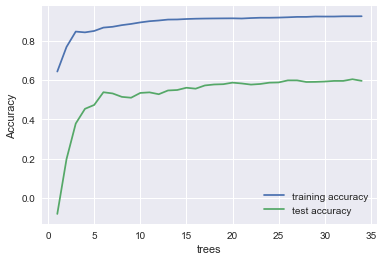

In [221]:

#testing best number of trees
training_accuracy = []
test_accuracy = []
# try number of trees from 1 to 35
tree_range = range(1, 35)
best_number = 0
best_score = 0

#train model for range of trees to get data for graph
for trees in tree_range:
    forest = RandomForestRegressor(n_estimators= trees, random_state=1)
    forest.fit(X_train_iq, y_train_iq)
    # record training set accuracy
    training_accuracy.append(forest.score(X_train_iq, y_train_iq))
    # record generalization accuracy
    temp = forest.score(X_test_iq, y_test_iq)
    if temp > best_score:
        best_number = trees
        best_score = temp 
    test_accuracy.append(temp)

#plot graph
plt.plot(tree_range, training_accuracy, label="training accuracy")
plt.plot(tree_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("trees")
plt.legend()
print(str(best_number) +" " + str (best_score))

55 0.0589091068144626


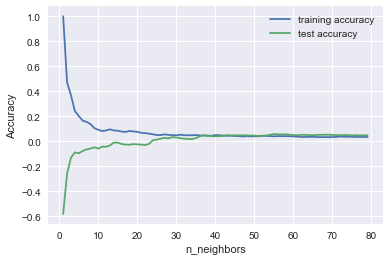

In [222]:
#testing best number of neigbours
training_accuracy = []
test_accuracy = []
# try n_neighbours from 1 to 80
neighbors_settings = range(1, 80)
best_number = 0
best_score = 0

#train model for all range of neigbors to get data for graph
for n_neighbors in neighbors_settings:
    knr = KNeighborsRegressor(n_neighbors = n_neighbors)
    knr.fit(X_train_iq, y_train_iq)
    # record training set accuracy
    training_accuracy.append(knr.score(X_train_iq, y_train_iq))
    # record generalization accuracy
    temp= knr.score(X_test_iq, y_test_iq)
    if temp > best_score:
        best_number = n_neighbors
        best_score = temp 
    test_accuracy.append(temp)

#plot graph
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print(str(best_number) +" " + str (best_score))


In [223]:

df_test = pd.read_csv("dengue_features_train.csv", index_col=[0, 1, 2])

df_test = df_test.drop(columns=["week_start_date"])

In [225]:
forest = RandomForestRegressor(n_estimators= 16, random_state=1)
forest.fit(X_train_iq, y_train_iq)


 # fill missing values
#df_test.fillna(method='ffill', inplace=True)

results = cross_val_score(forest, X_train_iq, y_train_iq, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 0.26 (0.36) MSE


In [264]:
x_size = X_train_iq.shape[1]
y_size = 1

# create model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=x_size, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(10,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(5,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal' ))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

def build_model_2():
    model = Sequential()
    model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    model.add(Dropout(0.1))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(y_size))
    model.compile(loss='mean_squared_error',
    optimizer='adam',
    metrics=[metrics.mae])
    return(model)

def build_model_3():
    model = Sequential()
    model.add(Dense(x_size, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    model.add(Dropout(0.2))
    model.add(Dense(int(x_size*2), activation="relu", kernel_initializer='normal',
    kernel_regularizer=regularizers.l1(1e-5), bias_regularizer=regularizers.l1(1e-5)))
    model.add(Dropout(0.3))
    model.add(Dense(int(x_size*.75), activation="relu", kernel_initializer='normal',
    kernel_regularizer=regularizers.l1_l2(1e-3), bias_regularizer=regularizers.l1_l2(1e-3)))
    model.add(Dropout(0.2))
    model.add(Dense(int(y_size*7), activation="relu", kernel_initializer='normal'))
    model.add(Dense(y_size))
    model.add(Dropout(0.2))
    model.compile(
    loss='mean_squared_error',
    optimizer='nadam',
    metrics=[metrics.mae])
    return model

seed = 7
np.random.seed(seed)

#estimator = KerasRegressor(build_fn=basic_model_3, epochs=100, batch_size=50, verbose=0)
#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X_train_iq, y_train_iq, cv=kfold)
model = build_model_2()
model.fit(X_train_iq, y_train_iq, epochs=100 , batch_size = 20, verbose=0)

In [275]:
pred = model.predict(X_train_iq)

In [272]:
results
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 0.26 (0.36) MSE


In [280]:
pred = forest.predict(X_test_iq)

In [281]:
pred

array([ 36.0625 ,  80.8125 ,  20.     ,  39.75   ,  29.125  ,  45.1875 ,
        49.0625 ,  13.875  ,  20.3125 ,  21.3125 ,  41.125  ,  26.4375 ,
        59.625  ,  24.8125 ,  49.8125 ,  41.5    ,  17.625  ,  63.25   ,
        35.25   ,  20.125  ,  85.0625 ,  21.     ,  27.875  ,  29.8125 ,
        45.1875 ,  42.5    ,   9.5    ,  16.0625 ,  35.3125 ,  34.625  ,
        90.9375 ,  14.5625 ,  45.25   ,  21.25   ,  21.0625 ,  20.625  ,
        26.75   ,  12.625  ,  22.875  ,  54.9375 ,  18.25   ,  18.1875 ,
        45.75   ,  31.125  ,  14.25   ,  34.8125 ,  30.     ,  57.625  ,
        17.3125 ,  34.25   ,  25.625  ,  24.6875 ,  15.     ,  10.5625 ,
        11.4375 ,  25.0625 ,  13.3125 ,  12.5625 ,  24.9375 ,  42.875  ,
        22.25   ,  15.75   ,  38.8125 ,  14.6875 ,  89.0625 ,  26.8125 ,
        11.6875 ,  13.875  ,  18.875  ,  42.375  ,  50.5625 ,  24.375  ,
        66.5    ,  14.1875 ,  40.875  ,  21.625  ,  16.5    ,  23.875  ,
        40.25   ,  37.5    ,  27.125  ,  13.4375 , 

In [279]:
pred

year  weekofyear
2004  50             12
1994  22             34
2005  33            126
2000  51             22
1994  5              39
2006  49             19
1999  30             30
1997  2              22
2002  48              5
2004  4              10
2003  28             20
2004  23             13
2008  11              2
2002  44             10
1996  44             33
2003  34             31
1998  35            204
1992  22             20
1990  51             26
1992  46             34
2007  14              3
1996  6              20
2003  40             41
2002  28              6
1991  32             62
1993  10             17
1997  33             10
2005  46             29
1999  3              75
1993  4              33
                   ... 
1995  11              7
1993  7              13
2002  31              5
1991  52             70
2000  39             11
1998  33            263
1991  31             25
2004  5              21
1994  14             13
1991  10             21